In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from matplotlib.pyplot import figure
import matplotlib
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

In [2]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.set_option('precision', 12);


def load_dataset(name):
    dataset = pd.read_csv(name, header=0, delimiter=',')
    return dataset


dataset = load_dataset('customerTargeting.csv')
data = dataset.values
labels = dataset.columns.values

In [3]:
dataset.describe()

,g1_1,g1_2,g1_3,g1_4,g1_5,g1_6,g1_7,g1_8,g1_9,g1_10,...,c_20,c_21,c_22,c_23,c_24,c_25,c_26,c_27,c_28,target
count,6620.00000,6620.00000,6620.00000,6620.00000,6620.00000,6620.00000,6620.00000,6620.00000,6620.00000,6620.00000,...,6620.00000,6620.00000,6620.00000,6620.00000,6620.00000,6620.00000,6620.00000,6620.00000,6620.00000,6620.00000
mean,2.70878,14.42402,10.48565,24.90967,10.98807,13.41208,10.16103,10.74547,14.16903,3.25106,...,-0.02931,-0.00672,-0.00415,0.00883,0.00000,-0.22843,-0.10373,0.00041,1.91713,1.03172
std,1.85772,10.70079,8.38420,18.17495,5.63598,10.09003,7.49504,7.96425,9.86673,8.48121,...,1.22075,1.06820,0.66324,0.68342,0.32287,3.39090,1.94442,0.09276,0.30218,0.73104
min,1.05000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,-27.00000,...,-4.68411,-4.31983,-2.51292,-3.11884,-2.00000,-15.20274,-9.18172,-0.75000,0.00000,0.00000
25%,1.66700,6.00000,4.00000,10.00000,6.00000,5.00000,4.00000,4.00000,6.00000,-2.00000,...,-0.71641,-0.53122,-0.44041,-0.40681,0.00000,-2.22223,-1.29347,-0.05433,1.71000,0.00000
50%,2.15000,13.00000,9.00000,22.00000,11.00000,12.00000,9.00000,9.00000,13.00000,1.00000,...,0.00000,0.00000,0.00000,0.00107,0.00000,-0.11938,-0.01249,0.00000,1.85000,1.00000
75%,2.80000,21.00000,15.00000,36.00000,16.00000,20.00000,15.00000,16.00000,21.00000,7.00000,...,0.65463,0.49050,0.41091,0.45010,0.00000,1.80933,1.03523,0.05483,2.02000,2.00000
max,23.00000,52.00000,47.00000,94.00000,20.00000,61.00000,43.00000,48.00000,52.00000,48.00000,...,4.82114,4.39628,2.98714,2.83055,2.00000,12.56270,8.20958,0.66667,4.33000,2.00000


In [4]:
y = data[:, 70]

In [5]:
X = data[:, [i for i in range(69)]]

In [6]:
X

array([[ 4.50000000e+00,  1.00000000e+00,  3.00000000e+00, ...,
        -3.23200000e+00, -1.94400000e+00, -7.94352044e-03],
       [ 2.20000000e+00,  2.40000000e+01,  2.20000000e+01, ...,
        -5.34217368e+00, -1.32135450e+00,  1.81063922e-01],
       [ 1.20000000e+01,  7.00000000e+00,  4.00000000e+00, ...,
        -6.56652100e+00, -4.17640335e+00, -4.02769281e-02],
       ...,
       [ 2.50000000e+00,  5.00000000e+00,  8.00000000e+00, ...,
         1.74344441e+00,  1.15972509e+00,  1.91948723e-02],
       [ 1.80000000e+00,  5.00000000e+00,  4.00000000e+00, ...,
         1.95916800e+00,  1.39641600e+00,  7.11798746e-02],
       [ 1.95000000e+00,  3.50000000e+01,  3.70000000e+01, ...,
        -3.36965072e+00, -4.92462849e-01,  4.25231278e-02]])

In [7]:
corr = dataset.corr()

<AxesSubplot:>

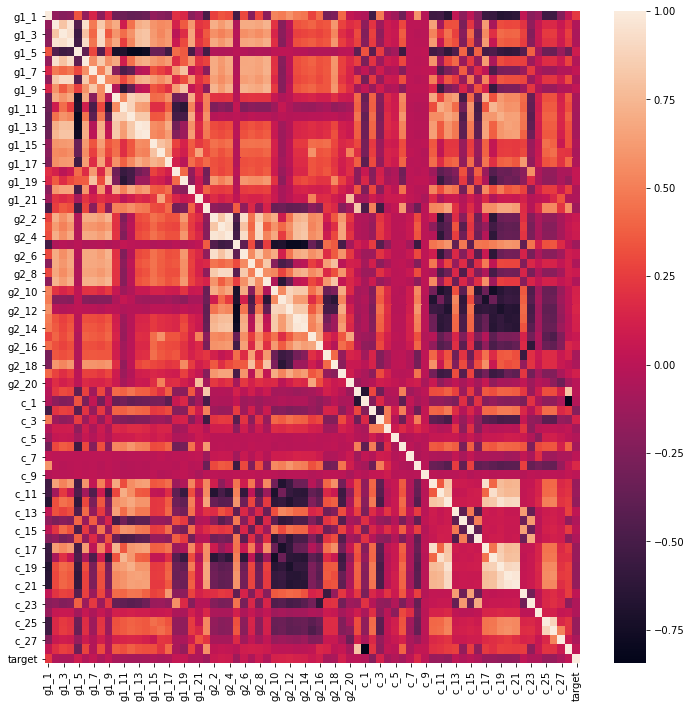

In [23]:
figure(num=None, figsize=(12, 12))

sns.heatmap(corr)

In [8]:
corr_target = corr['target']

In [9]:
corr_target

g1_1      0.23235
g1_2     -0.04270
g1_3     -0.06241
g1_4     -0.05393
g1_5      0.08791
           ...   
c_25     -0.14781
c_26     -0.14923
c_27     -0.06214
c_28      0.02135
target    1.00000
Name: target, Length: 71, dtype: float64

In [10]:
for i in range(70):
    if corr_target[i] <-0.1 or corr_target[i] >0.1:
        print(corr_target[i])
        print(i)

0.23234998298116402
0
-0.12020726853767753
21
-0.12188659826822577
25
0.12469087072530877
30
0.12983734078459627
31
0.1444494516419163
32
0.12419816076413902
33
0.11794120880513341
34
0.10208406099868146
36
0.11127676459759837
39
-0.2193705322455647
43
0.12375462428557049
44
0.1623622633170268
49
-0.14252631261891102
51
-0.13278657221053797
52
-0.1671398508042021
53
-0.14114322953729388
58
-0.13966477347227788
59
-0.16422370856431018
60
-0.16283372001064464
61
-0.15716332153873439
62
-0.14781332510114145
66
-0.14923256464569457
67


In [11]:
3#normalize this data


3

In [12]:
x_t, x_v, y_t, y_v = train_test_split(X, y, train_size=0.8)

In [14]:
scaler = preprocessing.StandardScaler().fit(x_t)
X_scaled = scaler.transform(x_t)
X_scaled

array([[ 0.54800232, -1.05895   , -1.25052355, ..., -0.07548084,
        -1.15457614, -3.67998147],
       [-0.48575052, -0.40308602, -0.41026819, ...,  0.10931552,
        -0.33212616, -0.85162203],
       [-0.24719217,  1.09603165,  1.39027901, ..., -0.51907959,
        -0.60221551, -0.22614141],
       ...,
       [-0.76141794, -0.21569631,  0.18991421, ...,  0.36455781,
         1.32437699,  2.19539779],
       [ 2.80105337, -0.0283066 , -0.77037763, ..., -0.71371031,
        -0.4515274 ,  0.46122737],
       [-0.52816089, -1.24633971, -0.77037763, ...,  0.20519071,
        -0.6722676 , -2.89106646]])

In [17]:
logireg = LogisticRegression(C=2, fit_intercept=True, penalty='l2', tol=0.001, max_iter = 1000000)
logireg.fit(X_scaled, y_t)
print ("Correct classification Logistic ", 0.8*100, "% of the data: ", logireg.score(x_v, y_v))
print(metrics.classification_report(y_v, logireg.predict(x_v)))

Correct classification Logistic  80.0 % of the data:  0.5279456193353474
              precision    recall  f1-score   support

         0.0       0.27      0.17      0.21       329
         1.0       0.64      0.68      0.66       647
         2.0       0.48      0.58      0.52       348

    accuracy                           0.53      1324
   macro avg       0.46      0.48      0.46      1324
weighted avg       0.50      0.53      0.51      1324



In [18]:
svcLin = svm.LinearSVC(C=10, max_iter=10000)
svcLin.fit(x_t,y_t)
print ("\n\nCorrect classification SVM Linear ", 0.8*100, "% of the data: ", svcLin.score(x_v, y_v))
print(metrics.classification_report(y_v, svcLin.predict(x_v)))  



Correct classification SVM Linear  80.0 % of the data:  0.5332326283987915
              precision    recall  f1-score   support

         0.0       0.31      0.01      0.02       329
         1.0       0.69      0.64      0.66       647
         2.0       0.41      0.84      0.55       348

    accuracy                           0.53      1324
   macro avg       0.47      0.49      0.41      1324
weighted avg       0.52      0.53      0.47      1324



C:\Users\Alex\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [20]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_scaled, y_t)
print(clf.score(x_v, y_v))


0.5785498489425982


In [30]:
hgb = HistGradientBoostingClassifier()
hgb.fit(X_scaled, y_t)
ls_preds = hgb.predict(x_v)
print('Score of Histogram-based Gradient Boosting Regression Tree: ', hgb.score(x_v,y_v))

Score of Histogram-based Gradient Boosting Regression Tree:  0.5823262839879154
